In [1]:
# Import function to calclulate geometry matrix of system
from Parameters_anisotropic import Rectangle_packing
#from Parameters_anisotropic import Params
from Verifying_MRI.Parameters_MRI import Params
Params['Rectangle_packing'] = Rectangle_packing
import numpy as np
from numpy import pi

In [2]:
# Calculating currents in each ring on fft way
from Fast_Method import solvesystem
#from Parameters_anisotropic import omega_0
from Verifying_MRI.Parameters_MRI import omega_0

import json

Inductance = {}
Omega =  np.linspace(0.95 * omega_0, 1.15 * omega_0, 100)

# Calculate polarisation for stick structure
N = {"x": 6, "y": 6, "z": 24}

Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/stick/Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/stick/Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

# Calculate polarisation for flat structure
N = {"x": 16, "y": 16, "z": 4}
Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/flat/Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/flat/Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

# Calculate polarisation for cube structure
N = {"x": 10, "y": 10, "z": 10}
Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/cube/Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/cube/Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

circvecs:Done
FFT solving


100%|██████████| 100/100 [00:01<00:00, 73.23it/s]


circvecs:Done
FFT solving


100%|██████████| 100/100 [00:01<00:00, 67.65it/s]


circvecs:Done
FFT solving


100%|██████████| 100/100 [00:01<00:00, 60.83it/s]


In [3]:
# Calculating currents in each ring on straight way
from Straight_Method import solvesystem
#from Parameters_anisotropic import omega_0
from Verifying_MRI.Parameters_MRI import omega_0

import json

Inductance = {}
Omega =  np.linspace(0.95 * omega_0, 1.05 * omega_0, 100)

# Calculate polarisation for stick structure
N = {"x": 6, "y": 6, "z": 24}

Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/stick/S-Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/stick/S-Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

# Calculate polarisation for flat structure
N = {"x": 16, "y": 16, "z": 4}
Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/flat/S-Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/flat/S-Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

# Calculate polarisation for cube structure
N = {"x": 10, "y": 10, "z": 10}
Data, Currents = solvesystem(Params, N, Omega, Inductance = Inductance)
with open(f"Data/Form_Data/anizotropic/cube/S-Currents{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Currents, f)
with open(f"Data/Form_Data/anizotropic/cube/S-Data{N['z']}x{N['y']}x{N['x']}", "w") as f:
    json.dump(Data, f)

Matrix: Done
Straight solving


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


Matrix: Done
Straight solving


100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


Matrix: Done
Straight solving


100%|██████████| 100/100 [00:33<00:00,  3.01it/s]


<Figure size 1000x500 with 0 Axes>

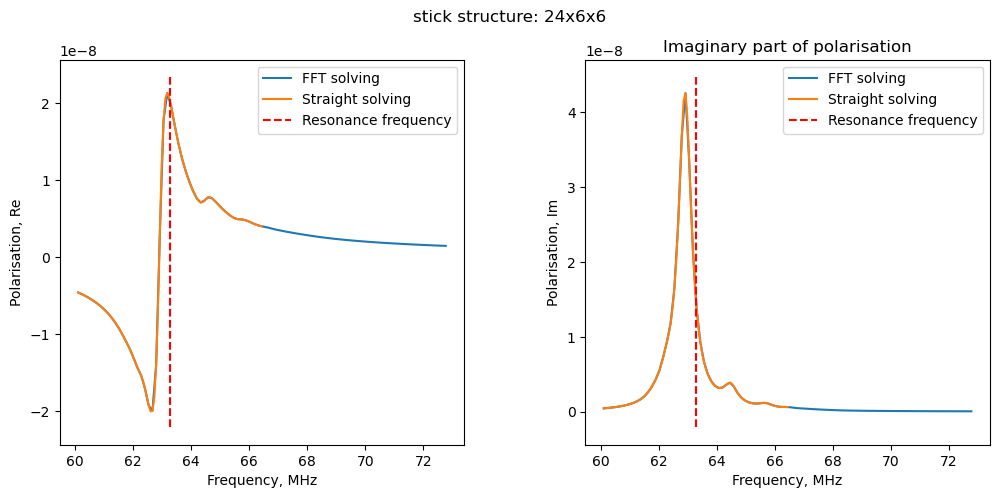

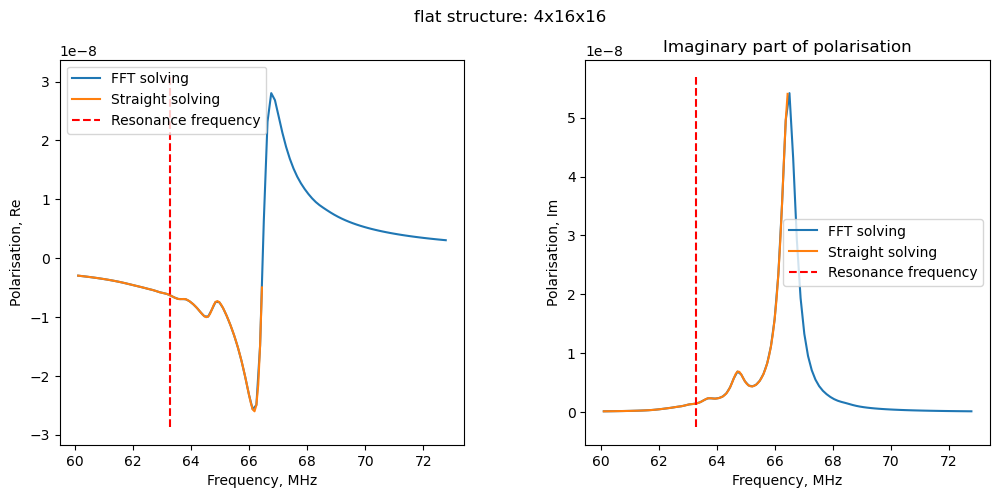

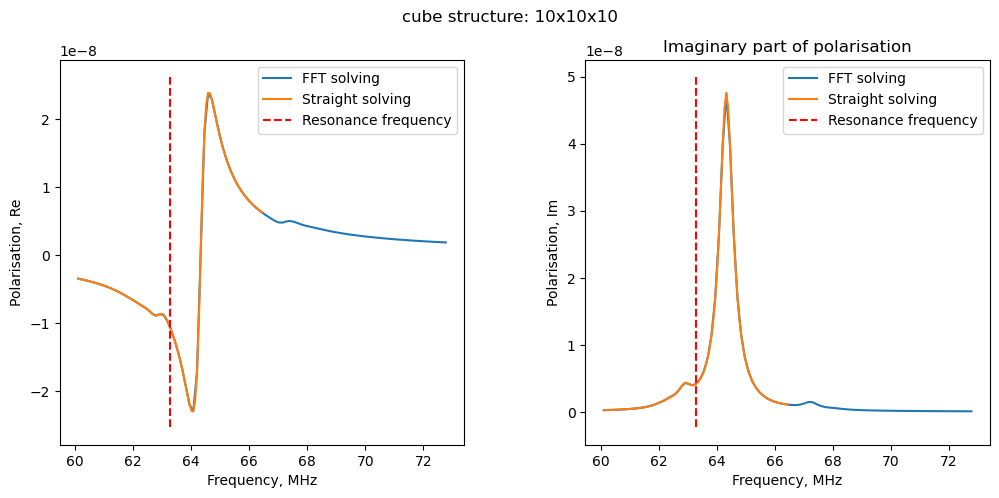

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

types = ["stick", "flat", "cube"]
Ns = [{"x": 6, "y": 6, "z": 24}, {"x": 16, "y": 16, "z": 4}, {"x": 10, "y": 10, "z": 10}]
mu_0 = 4 * pi * 10**-7

for type, N in zip(types, Ns):
    with open(f"Data/Form_Data/anizotropic/{type}/Data{N['z']}x{N['y']}x{N['x']}", "r") as f:
        Data = json.load(f)
    Omega = np.array(Data["Omega"])
    plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  
    plt.suptitle(f"{type} structure: {N['z']}x{N['y']}x{N['x']}")
    plt.subplot(121)
    

    plt.plot(Omega/2/np.pi/10**6, Data["RealPolarisation"], label = 'FFT solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.plot(Omega/2/np.pi/10**6, Data["ImagPolarisation"], label = 'FFT solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    with open(f"Data/Form_Data/anizotropic/{type}/S-Data{N['z']}x{N['y']}x{N['x']}", "r") as f:
        Data = json.load(f)
    
    Data['RealPolarisation'] = np.array(Data['RealPolarisation'])
    Data['ImagPolarisation'] = np.array(Data['ImagPolarisation'])
    Omega = np.array(Data["Omega"])

    plt.subplot(121) 

    plt.plot(Omega/2/np.pi/10**6, Data["RealPolarisation"], label = 'Straight solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Re")

    plt.subplot(122)
    plt.title("Imaginary part of polarisation")
    plt.plot(Omega/2/np.pi/10**6, Data["ImagPolarisation"], label = 'Straight solving')
    plt.xlabel("Frequency, MHz")
    plt.ylabel("Polarisation, Im")

    plt.subplot(121)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.legend()

    plt.subplot(122)
    ylim = plt.ylim()
    plt.vlines(omega_0/2/np.pi/10**6, ylim[0], ylim[1], color="red", linestyle="--", label='Resonance frequency')
    plt.legend()
    plt.show()

In [5]:
# Calculating currents in each ring for anizotropic system on straight way

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from Impedance_matrix import Matrix
from tqdm import tqdm





DATA = {}

H_0z = 1

Dimensions = ('z', 'y', 'x')
Orientation = ('z')

def solvesystem_fast(Params, N, Omega, grad = [0, 0, 0], Inductance = {}):
    # Unpacking parameters

    mu_0 = 4 * np.pi * 10 ** -7
    H_0z = 1

    L, C, R, W, Radius, Dz, Dy, Dx, Rectangle_packing = Params['L'], Params['C'], Params['R'], Params['W'], Params['Radius'], Params['Dz'], Params['Dy'], Params['Dx'], Params['Rectangle_packing']

    CURRENTS = []
    Polarisation = []

    nz = N[f"z"] + N[f"z"] - 1
    ny = N[f"y"] + N[f"y"] - 1
    nx = N[f"x"] + N[f"x"] - 1

    dim_old = N['z'] * N['z'] * N['y'] * N['y'] * N['x'] * N['x']
    dim_new = (N['z'], N['z'], N['y'], N['y'], N['x'], N['x'])


    Rings = Rectangle_packing(N, Radius, Dx, Dy, Dz, W)
    Number = len(Rings)

    M = Matrix(Rings, Rings, Data = Inductance)
    print('Matrix: Done')

    print('Straight solving')

    x, y, z = np.meshgrid(np.arange(N['x']), np.arange(N['y']), np.arange(N['z']), indexing = 'ij')
    gradx = x * grad[0] / N['x']
    grady = y * grad[1] / N['y']
    gradz = z * grad[2] / N['z']
    
    omega_0 = 1/np.sqrt(L * C)
    Omega_3d = omega_0 * (1 + gradz + grady + gradx)
    Cgrad = (1/L/Omega_3d ** 2).reshape(Number)
    E = H_0z * np.ones(Number) * np.pi * Radius ** 2 * mu_0
  
    for omega in tqdm(Omega):

        Zdiag = R/1j/omega + L - 1/( omega ** 2 * Cgrad)

        M_0 = np.diag(Zdiag)
        print('check dot', (M+M_0).dot(randI))
        I = solve(M + M_0, E)
        print('I', I)
        print('E', E)
        Volume = N['x'] * N['y'] * (N['z']-1) * Dz * Dy * Dx
        polarisation = np.pi * Radius ** 2 * I.sum()/Volume/(H_0z*omega)
        
        #print(f'Solving: Done - {round(omega/2/np.pi/10 ** 6, 1)}MHz, grad = {grad}')
        CURRENTS.append(I)
        Polarisation.append(polarisation)

    Data = {}

    Data['N'] = N
    Data['Omega'] = list(Omega)
    Data['grad'] = grad
    Data['params'] = [Dz, Dy, Dx, W, L, C, R, Radius]
    Data['RealPolarisation'] = list(np.real(Polarisation))
    Data['ImagPolarisation'] = list(np.imag(Polarisation))
    
    DataCurrents = {}
    DataCurrents['RealCurrents'] = [list(np.real(i).reshape(Number)) for i in CURRENTS]
    DataCurrents['ImagCurrents'] = [list(np.imag(i).reshape(Number)) for i in CURRENTS]

    return Data, DataCurrents

In [6]:
# Calculating currents in each ring on pyfftw way (one dimensional)

import numpy as np
from Impedance_matrix import Mnm
from scipy.sparse.linalg import gmres, LinearOperator
from pyfftw import pyfftw
from tqdm import tqdm


def Circvec(rings_3d, data):
    Nz, Ny, Nx = rings_3d.shape
    nz, ny, nx = 2*Nz-1, 2*Ny-1, 2*Nx-1
    Z_circvecs = pyfftw.empty_aligned((nz, ny, nx), dtype = 'complex128')
    for z in range(nz):
        for y in range(ny):
            for x in range(nx):
                x_str_id = (nx - x) * (x >= Nx)
                x_col_id = x * (x < Nx)

                y_str_id = (ny - y) * (y >= Ny)
                y_col_id = y * (y < Ny)

                z_str_id = (nz - z) * (z >= Nz)
                z_col_id = z * (z < Nz)
                
                Z_circvecs[z][y][x] = Mnm(rings_3d[z_str_id][y_str_id][x_str_id], rings_3d[z_col_id][y_col_id][x_col_id], data)
    return Z_circvecs

def fft_dot(I, ZI, FFT_Z_circvecs, i_vecs, ifft_i_vecs):
    nz, ny, nx = ZI.shape[0], ZI.shape[1], ZI.shape[2]
    Nz, Ny, Nx = (nz + 1) // 2, (ny + 1) // 2, (nx + 1) // 2
    i_vecs[:Nz, :Ny, :Nx] = I.reshape((Nz, Ny, Nx))

    pyfftw.FFTW(i_vecs, ifft_i_vecs, axes = (0, 1, 2), direction='FFTW_BACKWARD').execute()
    pyfftw.FFTW(FFT_Z_circvecs * ifft_i_vecs/nz/ny/nx, ZI, axes = (0, 1, 2)).execute()
    
    return ZI[:Nz, :Ny, :Nx].reshape(len(I))

def solvesystem(Params, N, Omega, grad = [0, 0, 0], Inductance = {}):
    # Unpacking parameters

    mu_0 = 4 * np.pi * 10 ** -7
    H_0z = 1

    L, C, R, W, Radius, Dz, Dy, Dx, Rectangle_packing = Params['L'], Params['C'], Params['R'], Params['W'], Params['Radius'], Params['Dz'], Params['Dy'], Params['Dx'], Params['Rectangle_packing']
    CURRENTS = []
    Polarisation = []

    nz = N[f"z"] + N[f"z"] - 1
    ny = N[f"y"] + N[f"y"] - 1
    nx = N[f"x"] + N[f"x"] - 1

    # Creating 3D array of rings
    Rings = Rectangle_packing(N, Radius, Dx, Dy, Dz, W)
    Rings_3d = Rings.reshape((N['z'], N['y'], N['x']))
    # Creating circulant
    M_circvecs = Circvec(Rings_3d, Inductance)
    Number = len(Rings)

    print('circvecs:Done')
    
    # Preparing empty arrays for pyfftw
    i_vecs = np.zeros((nz, ny, nx), dtype=complex)
    MI = pyfftw.empty_aligned((nz, ny, nx), dtype = 'complex128')

    FFT_M_circvecs = pyfftw.empty_aligned((nz, ny, nx), dtype = 'complex128')
    ifft_i_vecs = pyfftw.empty_aligned((nz, ny, nx), dtype = 'complex128')
    pyfftw.FFTW(M_circvecs, FFT_M_circvecs, axes = (0, 1, 2)).execute()
    
    # Caclulating diagonal of Z matrix using gradient
    omega_0 = 1/np.sqrt(L * C)
    print('FFT solving')
    I_old = np.ones(Number)
    z, y, x = np.meshgrid(np.arange(N['x']), np.arange(N['y']), np.arange(N['z']), indexing = 'ij')
    gradx = x * grad[0] / N['x']
    grady = y * grad[1] / N['y']
    gradz = z * grad[2] / N['z']
    
    omega_0 = 1/np.sqrt(L * C)
    Omega_3d = omega_0 * (1 + gradz + grady + gradx)
    Cgrad = (1/L/Omega_3d ** 2).reshape(Number)
    
    
    for omega in tqdm(Omega):
        M_0 = R/1j/omega + L - 1/(omega ** 2 * Cgrad)

        def LO(I):
            return fft_dot(I, MI, FFT_M_circvecs, i_vecs, ifft_i_vecs) + M_0 * I
        print('check dot', LO(randI))
        A = LinearOperator(dtype = np.complex128, shape=(Number, Number), matvec=LO)
        E = H_0z  * np.ones(Number) * np.pi * Radius ** 2 * mu_0
        I, info = gmres(A, E, x0 = I_old, tol = E.sum()/10**6)
        print(A.dot(I))
        print('I', info, I)
        print('E', E)
        Volume = N['x'] * N['y'] * (N['z']-1) * Dz * Dy * Dx
        polarisation = np.pi * Radius ** 2 * I.sum()/Volume/(H_0z*omega)
        
        #print(f'Solving: Done - {round(omega/2/np.pi/10 ** 6, 1)}MHz, grad = {grad}')
        CURRENTS.append(I)
        Polarisation.append(polarisation)
        I_old = I



    Data = {}

    Data['N'] = N
    Data['Omega'] = list(Omega)
    Data['grad'] = grad
    Data['params'] = [Dz, Dy, Dx, W, L, C, R, Radius]
    Data['RealPolarisation'] = list(np.real(Polarisation))
    Data['ImagPolarisation'] = list(np.imag(Polarisation))

    DataCurrents = {}
    DataCurrents['RealCurrents'] = [list(np.real(i).reshape(Number)) for i in CURRENTS]
    DataCurrents['ImagCurrents'] = [list(np.imag(i).reshape(Number)) for i in CURRENTS]
 
    return Data, DataCurrents   

In [7]:
# Debugging
from Verifying_MRI.Parameters_MRI import omega_0
np.set_printoptions(linewidth=np.inf)
Inductance = {}
Omega =  np.linspace(0.95 * omega_0, 1.05 * omega_0, 100)
randI = np.random.rand(8)
# Calculate polarisation for stick structure
N = {"x": 2, "y": 2, "z": 2}

Data, Currents = solvesystem(Params, N, [omega_0], Inductance = Inductance)
Data_fast, Currents_fast = solvesystem_fast(Params, N, [omega_0], Inductance = Inductance)

# x0 = np.arange(1, 3)
# y = np.array([1, 10])

# M = np.array([[1, 2], [3, 4]])
# def LO (x):
#     return M.dot(x)
# A = LinearOperator(dtype = np.complex128, shape=(2, 2), matvec=LO)

# x, info = gmres(A, y, x0 = x0)
# print(x)
# A.dot(x)

circvecs:Done
FFT solving


100%|██████████| 1/1 [00:00<00:00, 102.28it/s]


check dot [ 8.10325528e-11-8.55490921e-11j -2.04172671e-10-7.47081340e-11j -8.33574484e-11-9.12505032e-12j -1.14820998e-10-3.48010667e-11j  1.76200061e-11-1.12822516e-10j -1.75907343e-10-5.33065187e-12j -2.78264243e-10-7.72632830e-11j -1.43605950e-10-4.07374241e-11j]
[9.61466265e-11-2.58493941e-26j 9.61466265e-11+6.46234854e-27j 9.61466265e-11-3.23117427e-26j 9.61466265e-11-1.29246971e-26j 9.61466265e-11-1.93870456e-26j 9.61466265e-11-6.46234854e-27j 9.61466265e-11-1.29246971e-26j 9.61466265e-11+6.46234854e-27j]
I 0 [-0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j]
E [9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11]
Matrix: Done
Straight solving


100%|██████████| 1/1 [00:00<00:00, 2087.76it/s]

check dot [ 8.10325528e-11-8.55490921e-11j -2.04172671e-10-7.47081340e-11j -8.33574484e-11-9.12505032e-12j -1.14820998e-10-3.48010667e-11j  1.76200061e-11-1.12822516e-10j -1.75907343e-10-5.33065187e-12j -2.78264243e-10-7.72632830e-11j -1.43605950e-10-4.07374241e-11j]
I [-0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j -0.32419872+0.1583589j]
E [9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11 9.61466265e-11]


In [8]:
# Drawing GIFs
from PIL import Image
import numpy as np
from numpy import sqrt
Grads = {
    'Zero': [[0, 0, 0]],
    'Z': [[0, 0, 0.01],
        [0, 0, 0.03],
        [0, 0, 0.1],
        [0, 0, 0.3]],
    'X': [[0.01, 0, 0],
        [0.03, 0, 0],
        [0.1, 0, 0],
        [0.3, 0, 0]],
}
Omega =  np.linspace(0.9 * omega_0, 1.4*omega_0, 500)
for type in Grads:
    for orientation in ['ZX', 'YZ', 'XY']:
        for grad in Grads[type]:
            frames = []
            for omega in Omega:
                frame = Image.open(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/{orientation}3-f={round(omega/2/np.pi/10 ** 6, 2)}MHz.png')
                frames.append(frame)
            frames[0].save(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/GIFS/CD-{orientation}-20x20x20Rings3 grad{type} ={max(grad)}.gif',
                           save_all = True,
                           append_images = frames[1:], 
                           optimize = True, 
                           duration = 150, 
                           loop = 1)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/Zero-grad = 0/ZX3-f=56.95MHz.png'

In [ ]:
# Work with Data and calculate polarisation
import matplotlib.pyplot as plt
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Polarisation = {}
MaxCurrents = {}
MinCurrents = {}
FullGradPolarisation = {}
FullGradMaxCurrents = {}
FullGradMinCurrents = {}



Grads = {
    'Zero': [[0, 0, 0]],
    'Z': [[0, 0, 0.01],
        [0, 0, 0.03],
        [0, 0, 0.1],
        [0, 0, 0.3]],
    'X': [[0.01, 0, 0],
        [0.03, 0, 0],
        [0.1, 0, 0],
        [0.3, 0, 0]],
}
for type in Grads:
    for grad in Grads[type]:
        with open(f"DATA/Data{type}{max(grad)}-n=20.json", "r") as res:
            Data = json.loads(res.read())
        

        N = Data['N']
        Omega = np.array(Data['Omega'])
        a, a1, b, b1, c, c1, w, L, C, R = Data['params']
        M = np.array(Data['Matrix'])
        Number = len(M)
        Currents = np.array(Data['RealCurrents'], dtype = complex) + 1j * np.array(Data['ImagCurrents'], dtype = complex)
        BorderCurrents = np.array(Data['BorderCurrentReal'], dtype = complex) + 1j * np.array(Data['BorderCurrentImag'], dtype = complex)
        if max(grad) != 0:
            Polarisation[f'{type}{grad}'] = Data['RealPolarisation'] + 1j * np.array(Data['ImagPolarisation'], dtype = complex)
            MaxCurrents[f'{type}{grad}'] = Data['RealMaxCurrents'] + 1j * np.array(Data['ImagMaxCurrents'], dtype = complex)
            MinCurrents[f'{type}{grad}'] = Data['RealMinCurrents'] + 1j * np.array(Data['ImagMinCurrents'], dtype = complex)
        if max(grad) == max([max(grad2) for grad2 in Grads[type]]):
            FullGradPolarisation[max(grad)] = Data['BorderRealPolarisation'] + 1j * np.array(Data['BorderImagPolarisation'], dtype = complex)
            FullGradMaxCurrents[max(grad)] = Data['BorderRealMaxCurrents'] + 1j * np.array(Data['BorderImagMaxCurrents'], dtype = complex)
            FullGradMinCurrents[max(grad)] = Data['BorderRealMinCurrents'] + 1j * np.array(Data['BorderImagMinCurrents'], dtype = complex)
        if max(grad) == 0:
            FullGradPolarisation[0] = Data['RealPolarisation'] + 1j * np.array(Data['ImagPolarisation'], dtype = complex)
            FullGradMaxCurrents[0] = Data['RealMaxCurrents'] + 1j * np.array(Data['ImagMaxCurrents'], dtype = complex)
            FullGradMinCurrents[0] = Data['RealMinCurrents'] + 1j * np.array(Data['ImagMinCurrents'], dtype = complex)
        print(f'Data: got {type}-grad = {grad}')

        
        Currents3D = Currents.reshape((len(Omega), N['z'], N['y'], N['z']))
        MaxMiddleXZCurrents = np.real(Currents3D[:, :, N['y']//2, :]).max()
        MinMiddleXZCurrents = np.real(Currents3D[:, :, N['y']//2, :]).min()
        MaxMiddleYZCurrents = np.real(Currents3D[:, :, :, N['x']//2]).max()
        MinMiddleYZCurrents = np.real(Currents3D[:, :, :, N['x']//2]).min()
        MaxMiddleXYCurrents = np.real(Currents3D[:, N['z']//2, :, :]).max()
        MinMiddleXYCurrents = np.real(Currents3D[:, N['z']//2, :, :]).min()

        for I, omega in zip(Currents3D, Omega):
            
            X = list(range(N['x']))
            Y = list(range(N['y']))
            Z = list(range(N['z']))
            fig, ax = plt.subplots()
            fig.set_size_inches((10, 5))
            CurrentsXZ = I[:,N['y']//2,:]
            LinesXZ = plt.contour(X, Z, CurrentsXZ, 6, colors = 'black')
            Imax, Imin = CurrentsXZ.max(), CurrentsXZ.min()
            DeltaCurrents = np.real(Imax) - np.real(Imin)
            MaxDeltaCurrents = MaxMiddleXZCurrents - MinMiddleXZCurrents
            amplitude = DeltaCurrents/MaxDeltaCurrents
            middlepos = (Imin-MinMiddleXZCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            ticksnumber = round(amplitude * 10) + 1
            ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            plt.xlabel(r'$n_x$', fontsize = 15)
            plt.ylabel(r'$n_z$', fontsize = 15)
            plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            plt.contourf(X, Z, CurrentsXZ, 100, cmap=plt.cm.hot)
            plt.clabel(LinesXZ, inline=1, fontsize=15)
            plt.colorbar(label = 'Current', fraction = 0.09, pad = 0.25, 
                         shrink = 10, aspect = amplitude/0.09, anchor = (middlepos, 0),
                         ticks = ticks, orientation = 'horizontal'
                         ).ax.tick_params(rotation = 45)
            plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/ZX3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')
            
            # X = list(range(N['x']))
            # Y = list(range(N['y']))
            # Z = list(range(N['z']))
            # fig, ax = plt.subplots()
            # fig.set_size_inches((10, 5))
            # CurrentsYZ = I[:,:,N['x']//2]
            # LinesYZ = plt.contour(X, Z, CurrentsYZ, 6, colors = 'black')
            # Imax, Imin = CurrentsYZ.max(), CurrentsYZ.min()
            # DeltaCurrents = np.real(Imax) - np.real(Imin)
            # MaxDeltaCurrents = MaxMiddleYZCurrents - MinMiddleYZCurrents
            # amplitude = DeltaCurrents/MaxDeltaCurrents
            # middlepos = (Imin-MinMiddleYZCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            # ticksnumber = round(amplitude * 10) + 1
            # ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            # plt.xlabel(r'$n_y$', fontsize = 15)
            # plt.ylabel(r'$n_z$', fontsize = 15)
            # plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            # plt.contourf(Y, Z, CurrentsYZ, 100, cmap=plt.cm.hot)
            # plt.clabel(LinesYZ, inline=1, fontsize=15)
            # plt.colorbar(label = 'Current', fraction = 0.09, pad = 0.25, 
            #              shrink = 10, aspect = amplitude/0.09, anchor = (middlepos, 0),
            #              ticks = ticks, orientation = 'horizontal'
            #              ).ax.tick_params(rotation = 45)
            # plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/YZ3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')

            # X = list(range(N['x']))
            # Y = list(range(N['y']))
            # Z = list(range(N['z']))
            # fig, ax = plt.subplots()
            # fig.set_size_inches((7, 7))
            # CurrentsXY = I[N['z']//2, :, :]
            # LinesXY = plt.contour(X, Z, CurrentsXY, 6, colors = 'black')
            # Imax, Imin = CurrentsXY.max(), CurrentsXY.min()
            # DeltaCurrents = np.real(Imax) - np.real(Imin)
            # MaxDeltaCurrents = MaxMiddleXYCurrents - MinMiddleXYCurrents
            # amplitude = DeltaCurrents/MaxDeltaCurrents
            # middlepos = (Imin-MinMiddleXYCurrents)/(MaxDeltaCurrents - DeltaCurrents)
            # ticksnumber = round(amplitude * 10) + 1
            # ticks = list(map(lambda x: round(np.real(x), 2), np.linspace(Imax, Imin, ticksnumber)))

            # plt.xlabel(r'$n_x$', fontsize = 15)
            # plt.ylabel(r'$n_y$', fontsize = 15)
            # plt.title(f"$f =${round(omega/2/pi/10 ** 6, 2)},MHz", fontsize = 15)

            # plt.contourf(X, Y, CurrentsXY, 100, cmap=plt.cm.hot)
            # plt.clabel(LinesXY, inline=1, fontsize=15)
            # plt.colorbar(label = 'Current', fraction = 0.03, pad = 0.05, 
            #              shrink = 10, aspect = amplitude/0.03, anchor = (0, middlepos),
            #              ticks = ticks
            #              )
            # plt.savefig(f'/Users/shuramakarenko/Discrete_Model_Of_Metamaterial_Lens/Code/Plots/{type}-grad = {max(grad)}/XY3-f={round(omega/2/pi/10 ** 6, 2)}MHz.png')





In [ ]:
# Polarisation plots
for i in Polarisation:
    print(i)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel('Polarisation, imag')

plt.plot(Omega/2/np.pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/np.pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/np.pi/10 ** 6 /sqrt(L *C), 0, max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'Z[0, 0, 0.1]'], label = f'z-grad = {int(0.1 * 100)}%')
# plt.ylim(0, 3)
# plt.xlim(65, 75)
for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, Polarisation[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel('Polarisation, imag')

plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), 0, max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, Polarisation[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{max}$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, MaxCurrents[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{min}$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['Z']:
    plt.plot(Omega/2/pi/10**6, MinCurrents[f'Z{grad}'], label = f'z-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{max}$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')
for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, MaxCurrents[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I_{min}$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

for grad in Grads['X']:
    plt.plot(Omega/2/pi/10**6, MinCurrents[f'X{grad}'], label = f'x-grad = {int(max(grad) * 100)}%')

plt.legend()
plt.show() 

plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, MaxCurrents[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, MaxCurrents[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMaxCurrents[0.3]), max(FullGradMaxCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradMinCurrents[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradMaxCurrents[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, MinCurrents[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, MinCurrents[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradMinCurrents[0.3]), max(FullGradMinCurrents[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 


plt.figure(figsize=(12, 8))
plt.xlabel(r'$f$, MHz')
plt.ylabel(r'$I$')

plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0], label = f'no grad', linestyle = '--')
plt.plot(Omega/2/pi/10**6, FullGradPolarisation[0.3], label = f'all 30% different', linestyle = '--')
plt.plot(Omega/2/pi/10**6, Polarisation[f'Z[0, 0, 0.3]'], label = f'z-grad = {int(0.3 * 100)}%')
plt.plot(Omega/2/pi/10**6, Polarisation[f'X[0.3, 0, 0]'], label = f'x-grad = {int(0.3 * 100)}%')
print(max(Polarisation[f'Z[0, 0, 0.3]']), max(Polarisation[f'X[0.3, 0, 0]']) )
plt.vlines(1/2/pi/10 ** 6 /sqrt(L *C), min(FullGradPolarisation[0.3]), max(FullGradPolarisation[0.3]), label = 'resonance frequence', linestyle = ':')

plt.legend()
plt.show() 



# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')

# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1, 0.05):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'z{grad}'], label = f'z-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()   

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'x{grad}'], label = f'x-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'z0'], label = f'no grad', linestyle = '--')
# for grad in (0.3, 0.2, 0.1):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'multy{grad}'], label = f'multy-grad = {int(grad * 100)}%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, BasePolarisation[f'z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  

# plt.figure(figsize=(12, 8))
# plt.xlabel(r'$f$, MHz')
# plt.ylabel('Polarisation, imag')
# plt.plot(Omega/2/pi/10**6, Polarisation[f'Zero0'], label = f'no grad', linestyle = '--')
# for grad in ('Z', 'X', 'Multy'):
#     plt.plot(Omega/2/pi/10**6, Polarisation[f'{grad}0.3'], label = f'{grad}-grad = 30%')

# for grad in [0.3]:
#     plt.plot(Omega/2/pi/10**6, FullGradPolarisation[f'Z{grad}'], label = f'all 30% different', linestyle = '--')
# plt.legend()
# plt.show()  